## Problem Statement

The task of project is to classify handwritten digits.

![Classifying Handwritten digits](https://www.wolfram.com/mathematica/new-in-10/enhanced-image-processing/HTMLImages.en/handwritten-digits-classification/smallthumb_10.gif)


## About the MNIST dataset

It is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents. This set has been studied so much that it is often called the “Hello World” of Machine Learning: whenever people come up with a new classification algorithm, they are curious to see how it will perform on MNIST. Whenever someone learns Machine Learning, sooner or later they tackle MNIST.




## Fetching the data

Scikit-Learn provides many helper functions to download popular datasets. MNIST is one of them. The following code fetches the dataset

In [1]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [2]:
from sklearn.datasets import fetch_openml
import numpy as np
mnist = fetch_openml('mnist_784', version=1, cache=True)
#mnist

In [3]:
mnist.target = mnist.target.astype(np.int8)
sort_by_target(mnist)

### Structure of Datasets loaded by Scikit Learn

Datasets loaded by Sklearn have a dictionary structure. They have the following keys :

1. A DESCR key describing the dataset
1. A data key containing an array with one row per instance and one column per feature
1. A target key containing an array with the labels


### Looking into our Datasets

Out datasets consists of 70,000 images and each image has 784 features. A image consists of 28x28 pixels, and each pixel is a value from 0 to 255 describing the pixel intensity. 0 for white and 255 for black.


![MNIST dataset image](https://www.cntk.ai/jup/cntk103a_MNIST_input.png)

In [4]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

Since there are 70,000 images with 28x28 pixels


In [5]:
y.shape

(70000,)

This is label for each of the image. Since there are 70,000 images, hence there are 70,000 labels.

### Looking at one of the datasamples

To view the image of a single digit,all we need to do is grab an instance’s feature vector, reshape it to a 28×28 array, and display it using Matplotlib’s imshow() function.

In [6]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

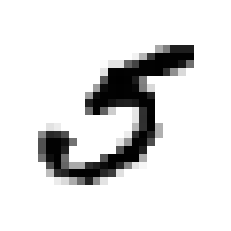

In [7]:
some_digit = X[36000]   # Selecting the 36,000th image.
some_digit_image = some_digit.reshape(28, 28) # Reshaping it to get the 28x28 pixels
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

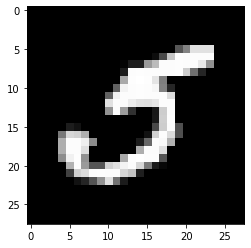

In [8]:
plt.imshow(255-some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")

The image looks like a 5. Let's verify it.

In [9]:
some_digit_image.shape

(28, 28)

In [10]:
X[36000].shape

(784,)

In [11]:
y[36000]

5

In [12]:
y.shape

(70000,)

In [13]:
some_digit_image

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

## Test train split
#Train set is the data on which our Machine learning model is trained.

#Test set is the data on which our model is finally evaluated

We need to split the data into test and train data. The MNIST dataset is actually already split into a training set (the first 60,000 images) and a test set (the last 10,000 images)


In [14]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


Also we need to **shuffle** our training data so that it ensures that we don't miss out any digit in a cross validation fold.

In [15]:
np.random.seed(42)
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## Multiclass Classification


> Binary classifiers distinguish between two classes, **multiclass classifiers (also called multinomial classifiers)** can distinguish between more than two classes.

![Multiclass classification](https://raw.githubusercontent.com/ritchieng/machine-learning-stanford/master/w3_logistic_regression_regularization/multiclass_classification.png)

There are basically two strategies using which you can use multiple binary classifiers for multiclass classification.

+ **One-versus-all (OvA) strategy also called one-versus-the-rest**

    For example, one way to create a system that can classify the digit images into 10 classes (from 0 to 9) is to train 10 binary classifiers, one for each digit (a 0-detector, a 1-detector, a 2-detector, and so on). Then when you want to classify an image, you get the decision score from each classifier for that image and you select the class whose classifier outputs the highest score.


+ **One-versus-one (OvO) strategy**

    This is another strategy in which we train a binary classifier for every pair of digits: one to distinguish 0s and 1s, another to distinguish 0s and 2s, another for 1s and 2s, and so on. If there are N classes, you need to train N × (N – 1) / 2 classifiers.

In [17]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42, max_iter=10)

Scikit-Learn detects when we try to use a binary classification algorithm for a multiclass classification task, and it automatically runs OvA (except for SVM classifiers for which it uses OvO). Let’s try this with the SGDClassifier:

In [18]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

c:\users\sony\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([5], dtype=int8)

Under the hood, Scikit-Learn actually trained **10 binary classifiers**, got their decision scores for **the image**, and selected the class with the highest score.

To see that this is indeed the case, you can call the decision_function() method. Instead of returning just one score per instance, it now **returns 10 scores**, one per class:

In [19]:
y_train[1000]

8

In [20]:
some_digit_scores = sgd_clf.decision_function([X_train[1000]])
some_digit_scores

array([[-267509.20001414, -394156.44832612,  -56146.63583926,
        -372654.032655  , -114735.98485769, -217137.99447395,
        -302545.78761571, -226519.39466287,  -36787.41625735,
        -277927.61280844]])

In [21]:
# The highest score is indeed the one corresponding to class 5:
print ("The index of the maxmimum score is ", np.argmax(some_digit_scores))

The index of the maxmimum score is  8


**To force ScikitLearn to use one-versus-one or one-versus-all, you can use the OneVsOneClassifier or OneVsRestClassifier classes**

To create a multiclass classifier using the OvO strategy, based on a SGDClassifier, we can do the following :

In [22]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42, max_iter=20))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

c:\users\sony\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
c:\users\sony\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
c:\users\sony\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
c:\users\sony\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence.

c:\users\sony\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
c:\users\sony\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
c:\users\sony\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
c:\users\sony\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence.

array([5], dtype=int8)

In [23]:
len(ovo_clf.estimators_)

45

**Evaluating the accuracy of SGDClassifier**


In [25]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

c:\users\sony\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
c:\users\sony\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
c:\users\sony\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.8809, 0.8679, 0.8676])

Simply scaling the inputs increases accuracy to above 90%

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

c:\users\sony\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
c:\users\sony\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
c:\users\sony\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.91255, 0.9109 , 0.90735])

## Error Analysis

First we'll make the Confusion Matrix. For this we need predictions.

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict


In [31]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

c:\users\sony\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
c:\users\sony\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
c:\users\sony\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([[5743,    2,   18,   10,   12,   39,   45,    8,   42,    4],
       [   1, 6470,   45,   24,    6,   44,    5,    9,  126,   12],
       [  49,   34, 5323,   97,   87,   28,   93,   55,  178,   14],
       [  49,   37,  129, 5349,    1,  236,   37,   56,  143,   94],
       [  21,   26,   35,   11, 5344,    8,   61,   30,   80,  226],
       [  69,   43,   28,  192,   64, 4597,  108,   30,  192,   98],
       [  33,   23,   41,    2,   43,   88, 5632,    9,   46,    1],
       [  27,   17,   68,   29,   50,   11,    6, 5795,   19,  243],
       [  54,  142,   58,  144,    8,  148,   63,   24, 5074,  136],
       [  42,   30,   24,   85,  158,   33,    2,  205,   81, 5289]],
      dtype=int64)

It is often convenient to represent the confusion matrix using Matplotlib’s matshow() function.

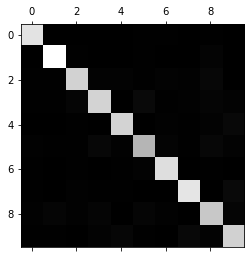

In [32]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

Most images are on the main diagonal, which means that they were classified correctly.

** Calculating error rates instead of absoluter error and plotting **

We need to divide each value in the confusion matrix by the number of images in the corresponding class, so you can compare error rates instead of absolute number of errors (which would make abundant classes look unfairly bad). We perform the normalization and plot the results again.

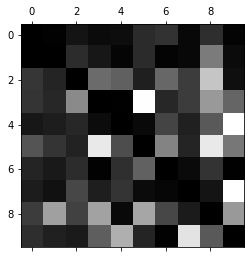

In [33]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

**Observing the error plot and making inferences**

There are several observations that can be made using the above plotted graph and the potential remedies to the source of error can also be identified. 

In [36]:
# EXTRA
import os
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

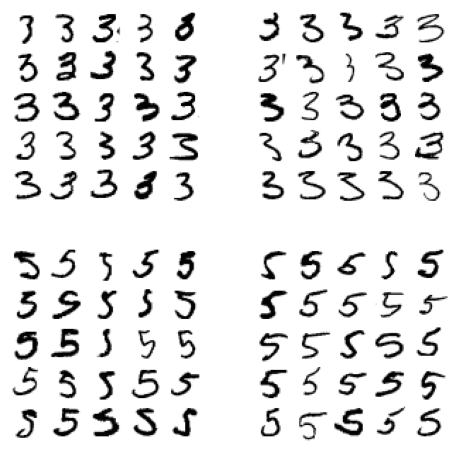

In [37]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()
